<a href="https://colab.research.google.com/github/swethag04/ml-projects/blob/main/kmeans/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means**


*   Unsupervised Clustering algorithm
*   K-means looks for patterns in the rows.
*   Centroid based method i.e. each cluster is characterized by a centroid
*   The goal of K-means is to group data points into k clusters based on similarity or closeness between clusters such that sum of the squared distances between all the points and the centorid (***Inertia***) is minimized.
*   Uses 2 steps:  ***Update step*** to adjust positions of centroids and ***Assignment step*** to cluster points with their nearest centroid
*  Perform an ensemble run for a range of values of K to determine the optimum value for K
* The initialization of centroid can be random or using a procedure called k-means++.
* Random initialization: Uses random k data points selected from the dataset as initial centroids. May result in poor clustering.
* k-means++ : Calculates an optimum value for the initial centroid, finding the next centroid based on the placement of fist centroid. k-means++ runs the entore algorithm multiple times, ending up wth centroids that provide the lowest inertia.










**Exploring Customer Segmentation using K-Means**

The objective is to profile customer groups for a large telecommunications company. The data contains information on customers purchasing and usage behavior with telecom products. The goal is to use PCA and clustering to segment these customers into meaningful groups.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('sample_data/telco_churn_data.csv')
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [3]:
df.shape

(7043, 46)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [5]:
# For this analysis, we are selecting numeric columns only
df_numeric = df.select_dtypes(exclude='object')
df_numeric.shape

(7043, 20)

In [6]:
# nulls
df_numeric.isnull().sum(axis = 0)

Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges       0
Avg Monthly GB Download                 0
Monthly Charge                          0
Total Regular Charges                   0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
Age                                     0
Number of Dependents                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Churn Value                             0
CLTV                                    0
Total Customer Svc Requests             0
Product/Service Issues Reported         0
Customer Satisfaction                5209
dtype: int64

In [7]:
# dropping customer satisfaction which has a lot of nulls
df_numeric = df_numeric.drop(['Customer Satisfaction'],axis=1)
df_numeric.shape

(7043, 19)

In [8]:
# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

The dataset now has 19 features which are all numeric and scaled.

PCA can be used now to reduce the number of dimensions in the dataset. To determine the optimum number of principal components, we can use Scree plot.

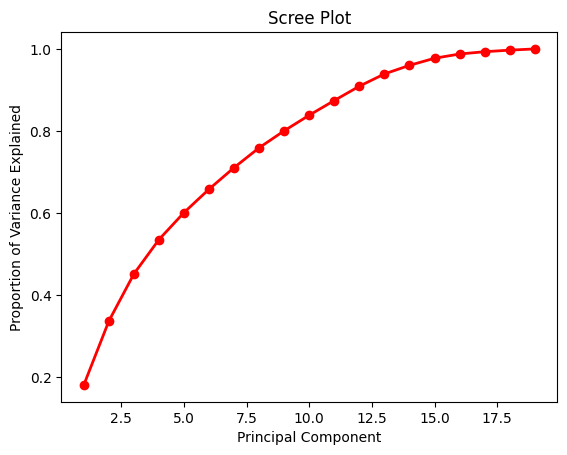

In [9]:
# Scree plot
pca_19 = PCA(n_components=19)
df_pca_19 = pca_19.fit_transform(df_scaled)

PC_values = range(1,len(pca_19.explained_variance_)+1)
plt.plot(PC_values, np.cumsum(pca_19.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

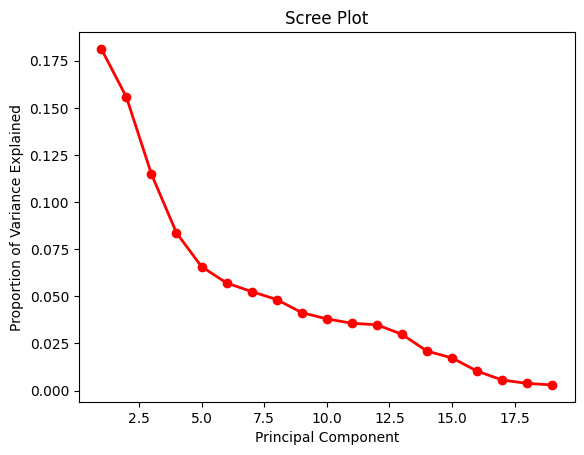

In [10]:
# Scree plot
pca_19 = PCA(n_components=19)
df_pca_19 = pca_19.fit_transform(df_scaled)

PC_values = range(1,len(pca_19.explained_variance_)+1)
plt.plot(PC_values, pca_19.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [11]:
np.cumsum(pca_19.explained_variance_ratio_)

array([0.18125101, 0.33698171, 0.45185368, 0.53552573, 0.60128755,
       0.65836269, 0.71089159, 0.75920092, 0.80056044, 0.83859119,
       0.87430654, 0.90919257, 0.93903596, 0.95997243, 0.97729461,
       0.98760248, 0.9932249 , 0.99700884, 1.        ])

From the scree plot, we can see that 9 principal components are optimum to explain >80% of variance in data



In [12]:
pca_9 = PCA(n_components=9)
df_pca_9 = pd.DataFrame(pca_9.fit_transform(df_scaled),
                        columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9'])
df_pca_9.head()


,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,-2.930864,2.637411,0.835112,-1.075815,1.620249,1.079828,-0.590845,-0.754142,1.689517
1,-1.436307,2.568182,1.652197,-1.485005,-0.858424,1.289768,-0.073063,0.299858,1.173028
2,-0.777204,2.379600,0.689567,1.211057,1.372912,1.197334,5.721375,0.787864,0.128400
3,-0.371825,2.040580,1.257118,-1.184470,1.343101,0.962900,1.194525,0.188395,-0.490176
4,-0.857584,1.888678,0.483286,-0.546009,1.581718,0.077658,0.008674,1.965380,-0.052025


The dataset has now been reduced to 9 dimensions. We will use K-Means clustering on this dataset to segment the data.

To determine the optimum value for K, we use the intertia score plot.

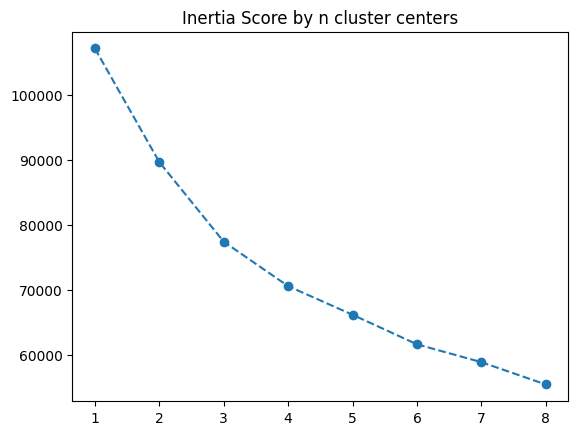

In [13]:
inertias = []
for i in range(1,9):
       #instantiate new KMeans instance
        kmeans = KMeans(n_clusters=i, random_state = 42)
        k = kmeans.fit(df_pca_9)
        #append inertia score to inertias list
        inertias.append(k.inertia_)
plt.plot(list(range(1, 9)), inertias, '--o')
plt.xticks(list(range(1, 9)), list(range(1, 9)))
plt.title('Inertia Score by n cluster centers')
plt.show()

Using the inertia plot elbow method, the optimal number of clusters = 3